# K-Means


The pinguins are back! Use K-Means to find groups from the penguins dataset. Do they correspond to the true labels?

In [14]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [15]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
sns.set_style('whitegrid')

In [16]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [17]:
penguins["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [18]:
X = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

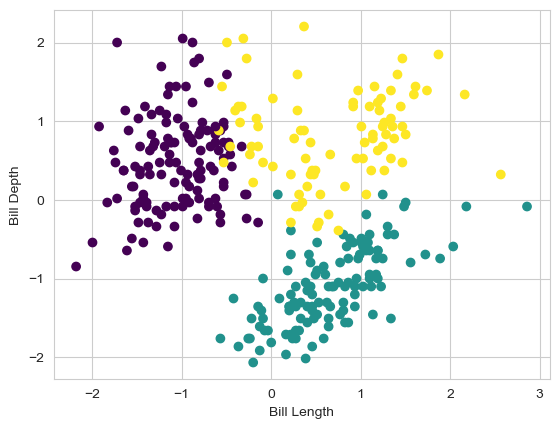

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,

In [21]:
#Make a plot where the color is the label assigned by the clustering
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.show()
labels

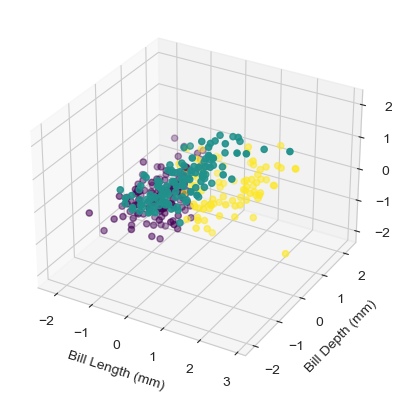

In [22]:
#Make a 3D plot where the color is the label assigned by the clustering
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

labels = kmeans.labels_

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')

ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')

plt.show()

In [23]:
#TODO To which label each class correspond? Search about scipy linear_sum_assignment
#It is an optimization problem.
#Show the table

true_labels =penguins['species'].astype('category').cat.codes.values
kmeans_labels = kmeans.labels_

cost_matrix = np.zeros((k, k))

for i in range(k):
    for j in range(k):
        cost_matrix[i, j] = np.sum((true_labels == i) & (kmeans_labels == j))

row_ind, col_ind = linear_sum_assignment(-cost_matrix)

table = np.zeros((k, k))

for i, j in zip(row_ind, col_ind):
    table[i, j] = cost_matrix[i, j]

print(table)


[[124.   0.   0.]
 [  0.   0.  63.]
 [  0. 119.   0.]]


In [13]:
y_true = penguins['species'].astype('category').cat.codes.values

confusion = pd.crosstab(y_true, labels)

row_ind, col_ind = linear_sum_assignment(-confusion)

print('True Label : K-Means Label')
for i in range(len(row_ind)):
    print(f'{row_ind[i]} : {col_ind[i]}')
    
print('Confusion Matrix:')
print(confusion)

True Label : K-Means Label
0 : 0
1 : 2
2 : 1
Confusion Matrix:
col_0    0    1   2
row_0              
0      124    0  22
1        5    0  63
2        0  119   0


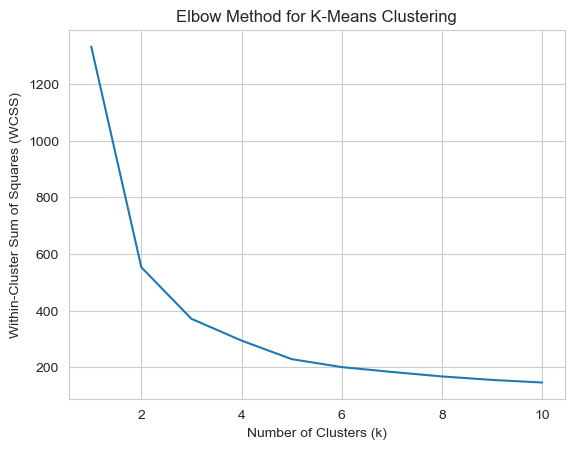

In [24]:
#TODO Do the elbow method for different k's
k_values = range(1, 11)

# Initialize an empty list to store the WCSS values for each value of k
wcss_values = []

# Compute the WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(X)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values as a function of k
plt.plot(k_values, wcss_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for K-Means Clustering')
plt.show()

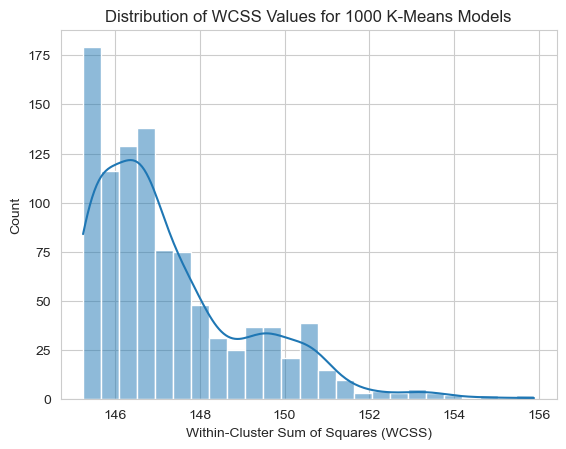

In [25]:
#TODO train 1000 models, with random initialization. Plot the results of the losses
n_models = 1000
wcss_values = []

# Randomly
for i in range(n_models):
    kmeans = KMeans(n_clusters=k,init='random',n_init=10, random_state=i)
    kmeans.fit(X)
    wcss_values.append(kmeans.inertia_)

sns.histplot(wcss_values, kde=True)
plt.xlabel('Within-Cluster Sum of Squares (WCSS)')
plt.title(f'Distribution of WCSS Values for {n_models} K-Means Models')
plt.show()

c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_k

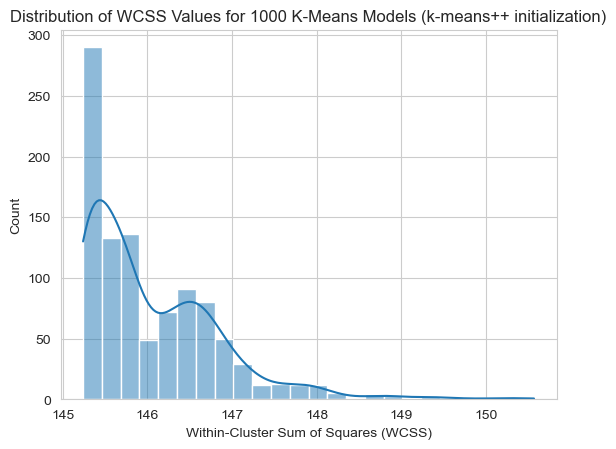

In [37]:
#TODO train 1000 models, with a better initialization. Plot the results of the losses
n_models = 1000
wcss_values = []

# k-means++ initialization
for i in range(n_models):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=i)
    kmeans.fit(X)
    wcss_values.append(kmeans.inertia_)

sns.histplot(wcss_values, kde=True)
plt.xlabel('Within-Cluster Sum of Squares (WCSS)')
plt.title(f'Distribution of WCSS Values for {n_models} K-Means Models (k-means++ initialization)')
plt.show()

In [ ]:
#TODO train 1000 models, with random initialization. Plot the results of the losses
n_models = 1000
wcss_values = []

# Randomly
for i in range(n_models):
    kmeans = KMeans(n_clusters=k,init='random',n_init=10, random_state=i)
    kmeans.fit(X)
    wcss_values.append(kmeans.inertia_)

sns.histplot(wcss_values, kde=True)
plt.xlabel('Within-Cluster Sum of Squares (WCSS)')
plt.title(f'Distribution of WCSS Values for {n_models} K-Means Models')
plt.show()

We have already seen the K-Means class. We know that it can help us to reduce dimensionality and understand how the data behave. We can use it for finding groups and classify them. Now, we are going to use it to do image segmentation.  

What do you think are the data points?  
How can we evaluate each point?  
How is different an image from a normal matrix of data?  

We are going to use RGB images. They have three channels and we must take those into account while computing the groups.

<img src="three_d_array.png" alt="three_d_array" width="300"/>

This time, you will have to implement K-Means by hand, do not use the sklearn. How can you define the centroids?

In [1]:
#Import libraries
from skimage import io
from skimage import color

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
%matplotlib inline
import requests


In [2]:
#Download image. Feel free to change the image. Remember that we are working with RGB images.
url = "https://www.rainforest-alliance.org/wp-content/uploads/2021/06/poison-dart-frog-thumb-1-400x400.jpg"
img_data = requests.get(url).content
with open('image.jpg', 'wb') as handler:
    handler.write(img_data)
img = io.imread("image.jpg")

(-0.5, 399.5, 399.5, -0.5)

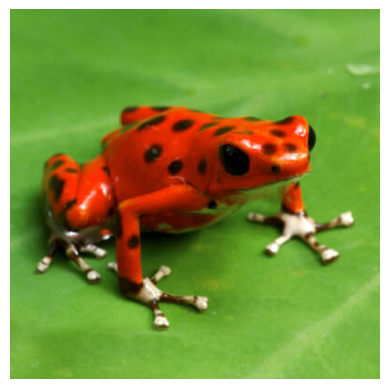

In [3]:
#Show image
plt.imshow(img)
plt.axis("off")

In [4]:
#Check the shape of the image. If there are more or less channels, we might have an image in another format
img.shape

(400, 400, 3)

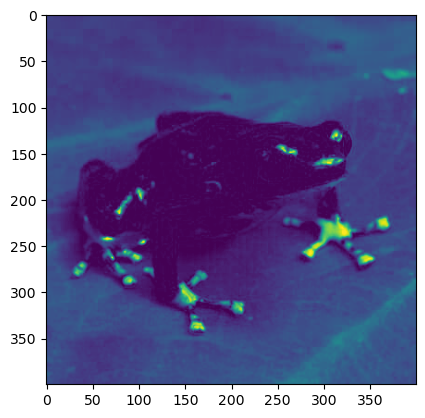

In [5]:
#Show just the blue channel
plt.imshow(img[:,:,2])

In [10]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for computing the new centroids. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new centroids. The data and labels do not change.
def compute_centroids(centroids, data):
    new_centroids = np.zeros_like(centroids)

    for i in range(centroids.shape[0]):
        # Find all the pixels that belong to the i-th centroid
        idx = (data[1] == i)
        pixels = data[0][idx]

        # Check if the cluster is empty
        if pixels.size == 0:
            # If the cluster is empty, set its centroid to a random RGB value
            new_centroids[i] = [np.random.randint(0, 255) for _ in range(3)]
        else:
            # Compute the mean of the pixel values in each channel
            new_center = np.mean(pixels, axis=0)

            # Store the new centroid
            new_centroids[i] = new_center

    return new_centroids

In [7]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for assigning the points to a new centroid. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new labels. The points are assigned based on Euclidean distance.

def assign(centroids, data):    
    new_labels = np.zeros_like(data[1])

    for i in range(data[0].shape[0]):
        for j in range(data[0].shape[1]):            
            pixel = data[0][i,j]
            distances = np.linalg.norm(pixel - centroids, axis=1)            
            new_labels[i,j] = np.argmin(distances)

    return new_labels

In [6]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method that implements K-Means. The parameters are:
#     - k. The problem with K-Means is that it needs a hyperparameter k, selected by the user.
#     - image. 
#Returns a segmented image.
def k_means(k, image):
    centroids = np.random.randint(0, 255, size=(k, 3))
        
    labels = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

    # Initialize the old_labels array with ones to enter the loop
    old_labels = np.ones_like(labels)

    # Loop until the labels converge
    while not np.array_equal(old_labels, labels):
        # Assign each pixel to the nearest centroid
        data = (image, labels)
        new_labels = assign(centroids, data)

        # Update the centroids based on the new labels
        data = (image, new_labels)
        new_centroids = compute_centroids(centroids, data)

        # Update the old labels and centroids
        old_labels = labels
        centroids = new_centroids
        labels = new_labels

    # Map each label to a unique RGB color
    colors = np.array([centroids[i] for i in range(k)])
    new_i = colors[labels]

    return new_i

In [11]:
#Get 8 new images, with a different number of clusters
images = []
for k in range(1,9):
    images.append(k_means(k,img))

In [30]:
#Method for showing the comparison of the images
def print_images(imagenes,img):
    #Configuration of the plot
    plt.figure(figsize=(15, 10))
    plt.subplot(int(np.ceil(len(imagenes)/3)), 3, 1)


    #Show original image
    plt.imshow(img)
    plt.title("Imagen Original")
    plt.axis("off")

    #Show the segmented images
    for idx in range(len(imagenes)):
        plt.subplot(np.ceil(len(imagenes)/3), 3, 2 + idx)
        plt.imshow(imagenes[idx].astype('uint8'))
        plt.title(f"{idx+1} Colors")
        plt.axis("off")
    plt.show()

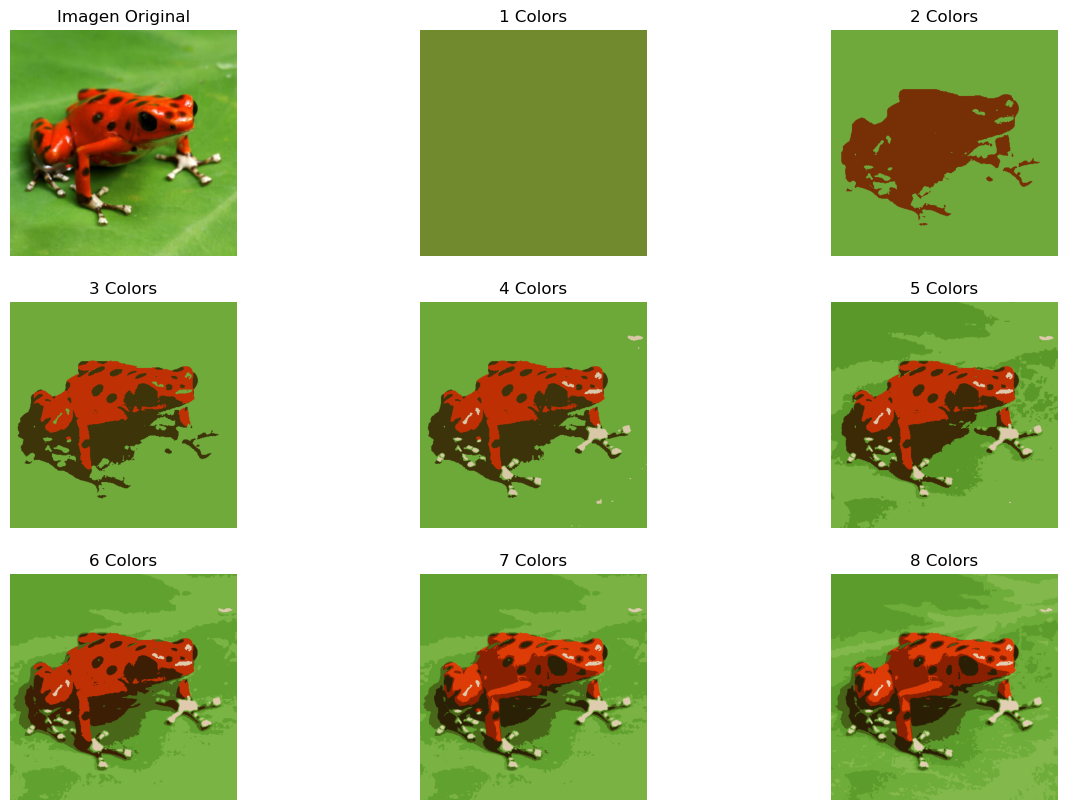

In [15]:
print_images(images)

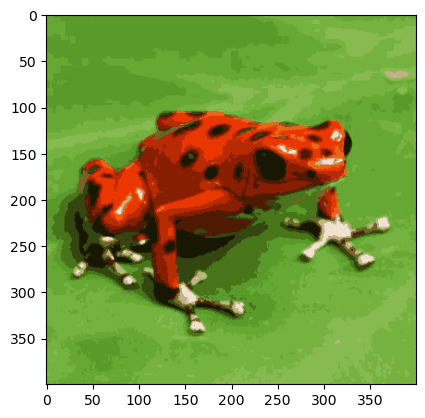

In [16]:
plt.imshow(k_means(15,img))

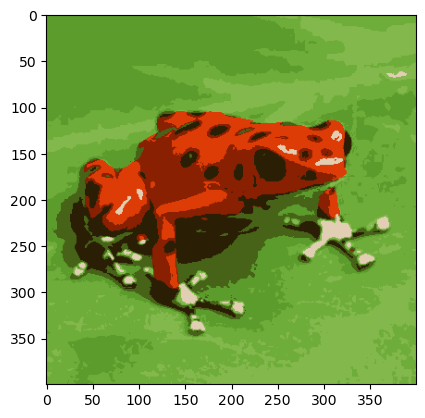

In [19]:
plt.imshow(images[6])
plt.show()

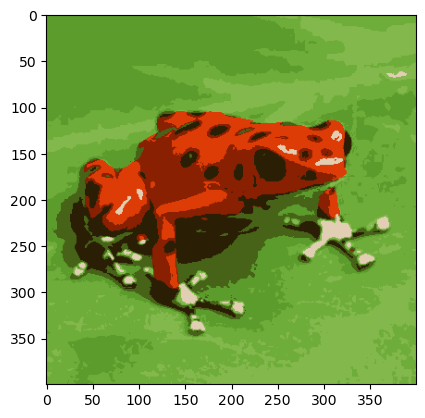

In [20]:
plt.imshow(images[7])
plt.show()

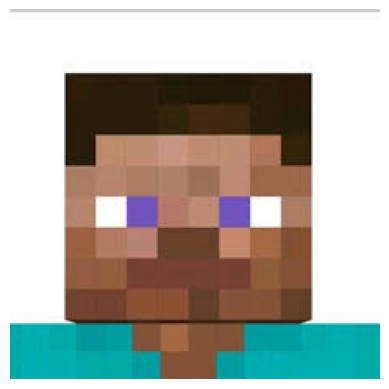

In [27]:
img2 = io.imread('steve.jpg')
plt.imshow(img2)
plt.axis('off')
plt.show()

In [28]:
images = []
for k in range(1,9):
    images.append(k_means(k,img2))

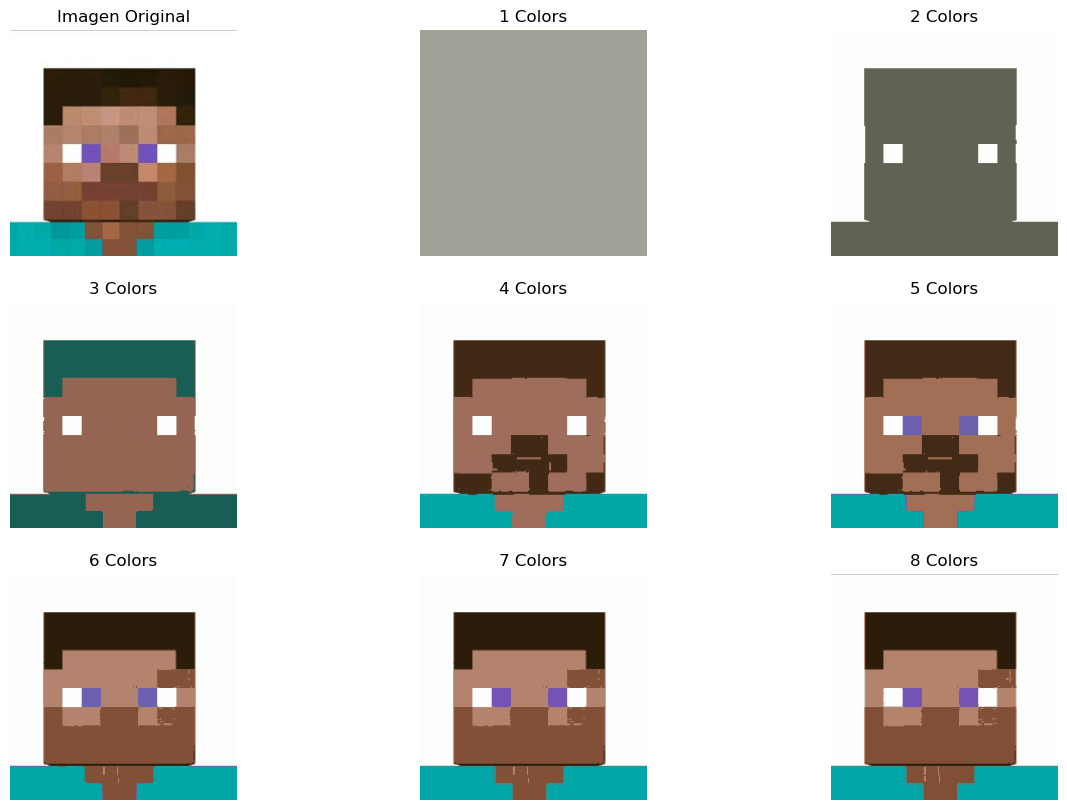

In [31]:
print_images(images,img2)

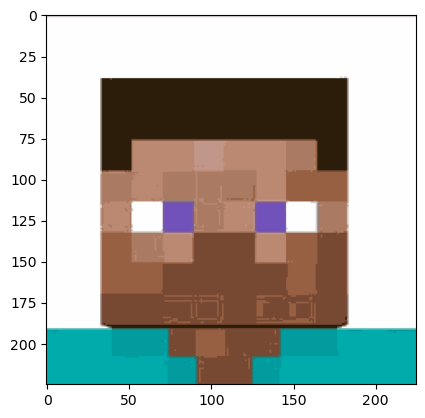

In [32]:
plt.imshow(k_means(15,img2))

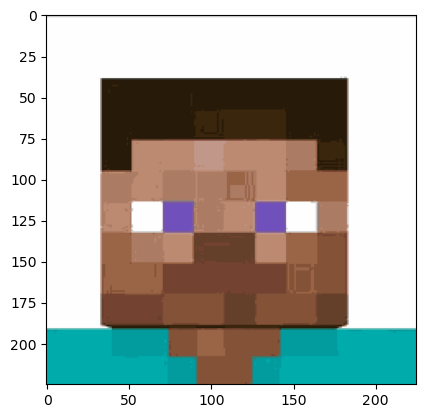

In [33]:
plt.imshow(k_means(20,img2))

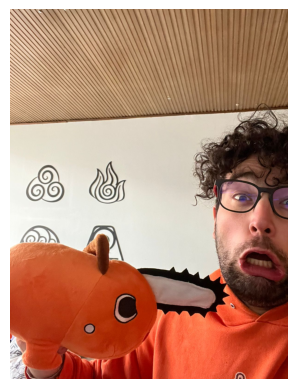

In [23]:
img1 = io.imread('pochita.jpeg')
plt.imshow(img1)
plt.axis('off')
plt.show()

In [25]:
img1.shape

(1600, 1200, 3)

In [26]:
k_values = [3, 6, 9, 15]
images = []
for k in range(1,9):
    images.append(k_means(k,img1))

KeyboardInterrupt: 

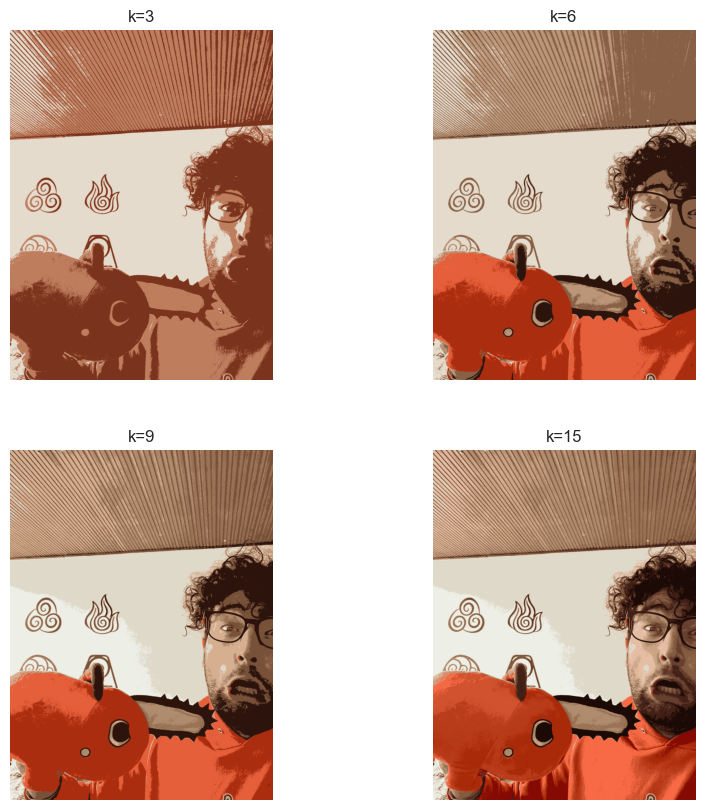

In [40]:
k_values = [3, 6, 9, 15]

images = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,n_init=10 ,random_state=42)
    labels = kmeans.fit_predict(img1.reshape(-1, 3))
    segmented_img = kmeans.cluster_centers_[labels].reshape(img1.shape)
    images.append(segmented_img.astype('uint8'))
    
plt.figure(figsize=(10, 10))
for i, img1 in enumerate(images):
    plt.subplot(2, 2, i+1)
    plt.imshow(img1)
    plt.title(f'k={k_values[i]}')
    plt.axis('off')
plt.show()